# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetv3.csv to datasetv3.csv


# Reading Data

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['datasetv3.csv']))

In [ ]:
# Mengubah nama kolom
df.columns= ['provinsi', 'kab/kota', 'produk', 'kategori', 'kualitas', 'harga_min', 'harga_max', 'harga_avg', 'harga_modal', 'penjualan', 'tanggal']

# Menambahkan kolom sales
df['sales']= df['harga_avg'] * df['penjualan']

# Melihat dataset
df

,provinsi,kab/kota,produk,kategori,kualitas,harga_min,harga_max,harga_avg,harga_modal,penjualan,tanggal,sales
0,Jawa Barat,Bogor,Rok Midi Trendy,Rok,Import,32000,51200,41600,25600,84,2020-01-02,3494400
1,Jawa Barat,Tasikmalaya,Gelang Kulit Asli,Gelang,Standard,85000,136000,110500,68000,71,2020-01-03,7845500
2,Jawa Barat,Banjar,Gelang Kulit Asli,Gelang,Local,54000,86400,70200,43200,92,2020-01-04,6458400
3,Jawa Barat,Bekasi,Sweater Hoodie Sporty,Sweater,Import,33000,52800,42900,26400,100,2020-01-05,4290000
4,Jawa Barat,Ciamis,Sepatu Running Ringan,Sepatu,Import,129000,206400,167700,103200,44,2020-01-06,7378800
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Jawa Barat,Bekasi,Gelang Tangan Vintage,Gelang,Standard,39000,62400,50700,31200,3,2023-12-27,152100
1456,Jawa Barat,Cirebon,Parfum Wangi Floral,Parfum,Local,20000,32000,26000,16000,10,2023-12-28,260000
1457,Jawa Barat,Cimahi,Tas Makeup Portable,Tas Makeup,Import,110000,176000,143000,88000,88,2023-12-29,12584000
1458,Jawa Barat,Bekasi,Baju Kebaya Elegan,Baju Kebaya,Premium,105000,168000,136500,84000,93,2023-12-30,12694500


**Keterangan Variabel:**

* **provinsi:** nama provinsi tempat produk UMKM dipasarkan (hanya Jawa Barat)
* **kab/kota:** nama kabupaten/kota tempat produk UMKM dipasarkan
* **produk:** nama produk yang dijual oleh UMKM
* **kategori:** jenis produk yang dijual oleh UMKM
* **kualitas:** tingkat kualitas produk (Standard, Premium, Local, Import)
* **harga_min:** harga terendah dari produk yang dijual
* **harga_max:** harga tertinggi dari produk yang dijual
* **harga_avg:** harga rata-rata produk
* **harga_modal:** biaya produksi atau akuisisi produk
* **penjualan:** jumlah produk yang terjual dalam periode tertentu
* **tanggal:** tanggal ketika penjualan dilakukan
* **sales:** total penjualan (harga_avg * penjualan)


In [ ]:
# Mengidentifikasi tipe data masing-masing variabel
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['harga_min', 'harga_max', 'harga_avg', 'harga_modal', 'penjualan', 'sales'], object: ['provinsi', 'kab/kota', 'produk', 'kategori', 'kualitas', 'tanggal']}

In [ ]:
# Mengubah tipe data variabel Tanggal Penjualan menjadi datetime
df["tanggal"] = pd.to_datetime(df["tanggal"])

In [ ]:
# Mengelompokkan variabel sebagai numerical dan categorical columns
numerical_columns = df.select_dtypes(include='int64').columns
categorical_columns = df.select_dtypes(include=['object','datetime64[ns]']).columns

In [ ]:
# Melihat kolom yang bertipe numerikal
numerical_columns

Index(['harga_min', 'harga_max', 'harga_avg', 'harga_modal', 'penjualan',
       'sales'],
      dtype='object')

In [ ]:
# Melihat kolom yang bertipe kategorikal
categorical_columns

Index(['provinsi', 'kab/kota', 'produk', 'kategori', 'kualitas', 'tanggal'], dtype='object')

In [ ]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   provinsi     1460 non-null   object        
 1   kab/kota     1460 non-null   object        
 2   produk       1460 non-null   object        
 3   kategori     1460 non-null   object        
 4   kualitas     1460 non-null   object        
 5   harga_min    1460 non-null   int64         
 6   harga_max    1460 non-null   int64         
 7   harga_avg    1460 non-null   int64         
 8   harga_modal  1460 non-null   int64         
 9   penjualan    1460 non-null   int64         
 10  tanggal      1460 non-null   datetime64[ns]
 11  sales        1460 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 137.0+ KB


Dari hasil di atas, terlihat bahwa **tidak ada missing value** dalam data yang kita miliki.


In [ ]:
# Cek duplikat data
df.duplicated().sum()

0

Dari hasil di atas, terlihat bahwa **tidak ada data duplikat** dalam data yang kita miliki.

## Descriptive Statistics

In [ ]:
# Melihat statistik deskriptif dari data
df.describe()

,harga_min,harga_max,harga_avg,harga_modal,penjualan,sales
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03
mean,81104.109589,129766.575342,105435.342466,64883.287671,50.116438,5.260607e+06
std,45536.284859,72858.055774,59197.170317,36429.027887,29.291195,4.577391e+06
min,10000.000000,16000.000000,13000.000000,8000.000000,1.000000,1.430000e+04
25%,43000.000000,68800.000000,55900.000000,34400.000000,25.000000,1.657500e+06
50%,75500.000000,120800.000000,98150.000000,60400.000000,50.000000,3.901950e+06
75%,115000.000000,184000.000000,149500.000000,92000.000000,76.000000,7.842575e+06
max,199000.000000,318400.000000,258700.000000,159200.000000,100.000000,2.421120e+07


## Unique & Frequency

In [ ]:
# Periksa nilai unik dan frekuensinya
numeric_unique_values = {column: df[column].unique() for column in df.select_dtypes(include='int64').columns}
numeric_value_frequencies = {column: df[column].value_counts() for column in df.select_dtypes(include='int64').columns}

categorical_unique_values = {column: df[column].unique() for column in df.select_dtypes(include=['object', 'datetime64[ns]']).columns}
categorical_value_frequencies = {column: df[column].value_counts() for column in df.select_dtypes(include=['object', 'datetime64[ns]']).columns}

### Variabel Numerik

In [ ]:
print("Nilai Unik Numerik:")
for column, values in numeric_unique_values.items():
    print(f"{column}: {values}")
    print()

Nilai Unik Numerik:
harga_min: [ 32000  85000  54000  33000 129000  35000 197000  39000 191000  55000
  34000 168000  89000 137000  31000 100000 109000  77000  19000  80000
  36000  50000 104000  94000  76000  29000 122000  64000  81000 146000
  38000  98000  78000 134000  30000 150000 114000  97000 125000 141000
 103000 131000 135000  37000  92000  95000  52000 105000 111000  57000
 108000 140000  93000  12000  46000 198000  47000 101000 147000 194000
  75000  96000 180000  26000  63000 117000 136000 133000 116000  74000
  24000  58000 106000  44000 138000  20000  49000 144000  72000  23000
 159000  59000 154000  61000  45000  90000 158000 113000  69000  40000
 128000  51000  13000  15000  21000 143000  42000 127000  18000 126000
  28000  67000  53000  68000  41000  83000  88000 161000 148000  65000
  62000  70000 139000 142000  14000 120000 110000 184000 112000 173000
  11000 193000 164000 107000 178000  27000  82000  99000  79000  22000
  71000  10000  84000 102000  56000  60000  66

In [ ]:
print("Frekuensi Nilai Numerik:")
for column, frequencies in numeric_value_frequencies.items():
    print(f"{column}:\n{frequencies}")
    print()

Frekuensi Nilai Numerik:
harga_min:
50000     27
34000     20
31000     19
57000     18
61000     18
          ..
170000     1
199000     1
165000     1
186000     1
196000     1
Name: harga_min, Length: 184, dtype: int64

harga_max:
80000     27
54400     20
49600     19
91200     18
97600     18
          ..
272000     1
318400     1
264000     1
297600     1
313600     1
Name: harga_max, Length: 184, dtype: int64

harga_avg:
65000     27
44200     20
40300     19
74100     18
79300     18
          ..
221000     1
258700     1
214500     1
241800     1
254800     1
Name: harga_avg, Length: 184, dtype: int64

harga_modal:
40000     27
27200     20
24800     19
45600     18
48800     18
          ..
136000     1
159200     1
132000     1
148800     1
156800     1
Name: harga_modal, Length: 184, dtype: int64

penjualan:
90    24
30    24
17    24
3     22
4     22
      ..
88     8
98     7
45     7
95     7
28     6
Name: penjualan, Length: 100, dtype: int64

sales:
3120000     5
9984

### Variabel Kategorik

In [ ]:
print("Nilai Unik Kategorikal:")
for column, values in categorical_unique_values.items():
    print(f"{column}: {values}")
    print()

Nilai Unik Kategorikal:
provinsi: ['Jawa Barat']

kab/kota: ['Bogor' 'Tasikmalaya' 'Banjar' 'Bekasi' 'Ciamis' 'Bandung Barat'
 'Kuningan' 'Purwakarta' 'Karawang' 'Garut' 'Depok' 'Sumedang' 'Cianjur'
 'Majalengka' 'Indramayu' 'Cirebon' 'Bandung' 'Subang' 'Sukabumi' 'Cimahi']

produk: ['Rok Midi Trendy' 'Gelang Kulit Asli' 'Sweater Hoodie Sporty'
 'Sepatu Running Ringan' 'Kaos Polo Pria' 'Tas Backpack Casual'
 'Celana Cargo Praktis' 'Gelang Fashion Trendy' 'Tas Sling Bag Trendy'
 'Topi Beanie Hangat' 'Sepatu Sneakers' 'Baju Kebaya Elegan'
 'Sepatu High Heels Glamor' 'Sepatu Loafer Formal' 'Blouse Wanita Elegan'
 'Tas Makeup Portable' 'Lipstik Velvet Matte' 'Parfum Floral Fruity'
 'Rok Mini Trendy' 'Kacamata Oversize Stylish' 'Kemeja Kotak-Kotak'
 'Celana Legging Nyaman' 'Anting Emas Cantik' 'Celana Jeans Slim Fit'
 'Gelang Tangan Vintage' 'Anting Gantung Unik' 'Dompet Wanita Stylish'
 'Baju Koko Modern' 'Topi Trucker Trendy' 'Celana Chino Slim Fit'
 'Lipstik Matte Long-lasting' 'Sepatu B

In [ ]:
print("Frekuensi Nilai Kategorikal:")
for column, frequencies in categorical_value_frequencies.items():
    print(f"{column}:\n{frequencies}")
    print()

Frekuensi Nilai Kategorikal:
provinsi:
Jawa Barat    1460
Name: provinsi, dtype: int64

kab/kota:
Cirebon          150
Bekasi           121
Depok            107
Kuningan          75
Cimahi            74
Garut             73
Majalengka        73
Karawang          71
Subang            67
Bandung           66
Tasikmalaya       64
Ciamis            62
Purwakarta        62
Sukabumi          62
Bogor             61
Indramayu         58
Bandung Barat     57
Banjar            53
Sumedang          52
Cianjur           52
Name: kab/kota, dtype: int64

produk:
Gelang Kulit Asli         61
Blouse Wanita Elegan      57
Tas Sling Bag Trendy      55
Sepatu Loafer Formal      55
Celana Legging Nyaman     54
                          ..
Tas Selempang Chic         4
Jas Pria Slim Fit          4
Kacamata Retro Vintage     4
Jas Blazer Slim Fit        4
Tas Pesta Glamor           3
Name: produk, Length: 84, dtype: int64

kategori:
Tas            170
Sepatu         152
Celana         140
Gelang         128

## Korelasi

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,harga_min,harga_max,harga_avg,harga_modal,penjualan,sales
harga_min,1.000000,1.000000,1.000000,1.000000,-0.013526,0.638688
harga_max,1.000000,1.000000,1.000000,1.000000,-0.013526,0.638688
harga_avg,1.000000,1.000000,1.000000,1.000000,-0.013526,0.638688
harga_modal,1.000000,1.000000,1.000000,1.000000,-0.013526,0.638688
penjualan,-0.013526,-0.013526,-0.013526,-0.013526,1.000000,0.662687
sales,0.638688,0.638688,0.638688,0.638688,0.662687,1.000000


# Exploratory Data Analysis

## Histogram

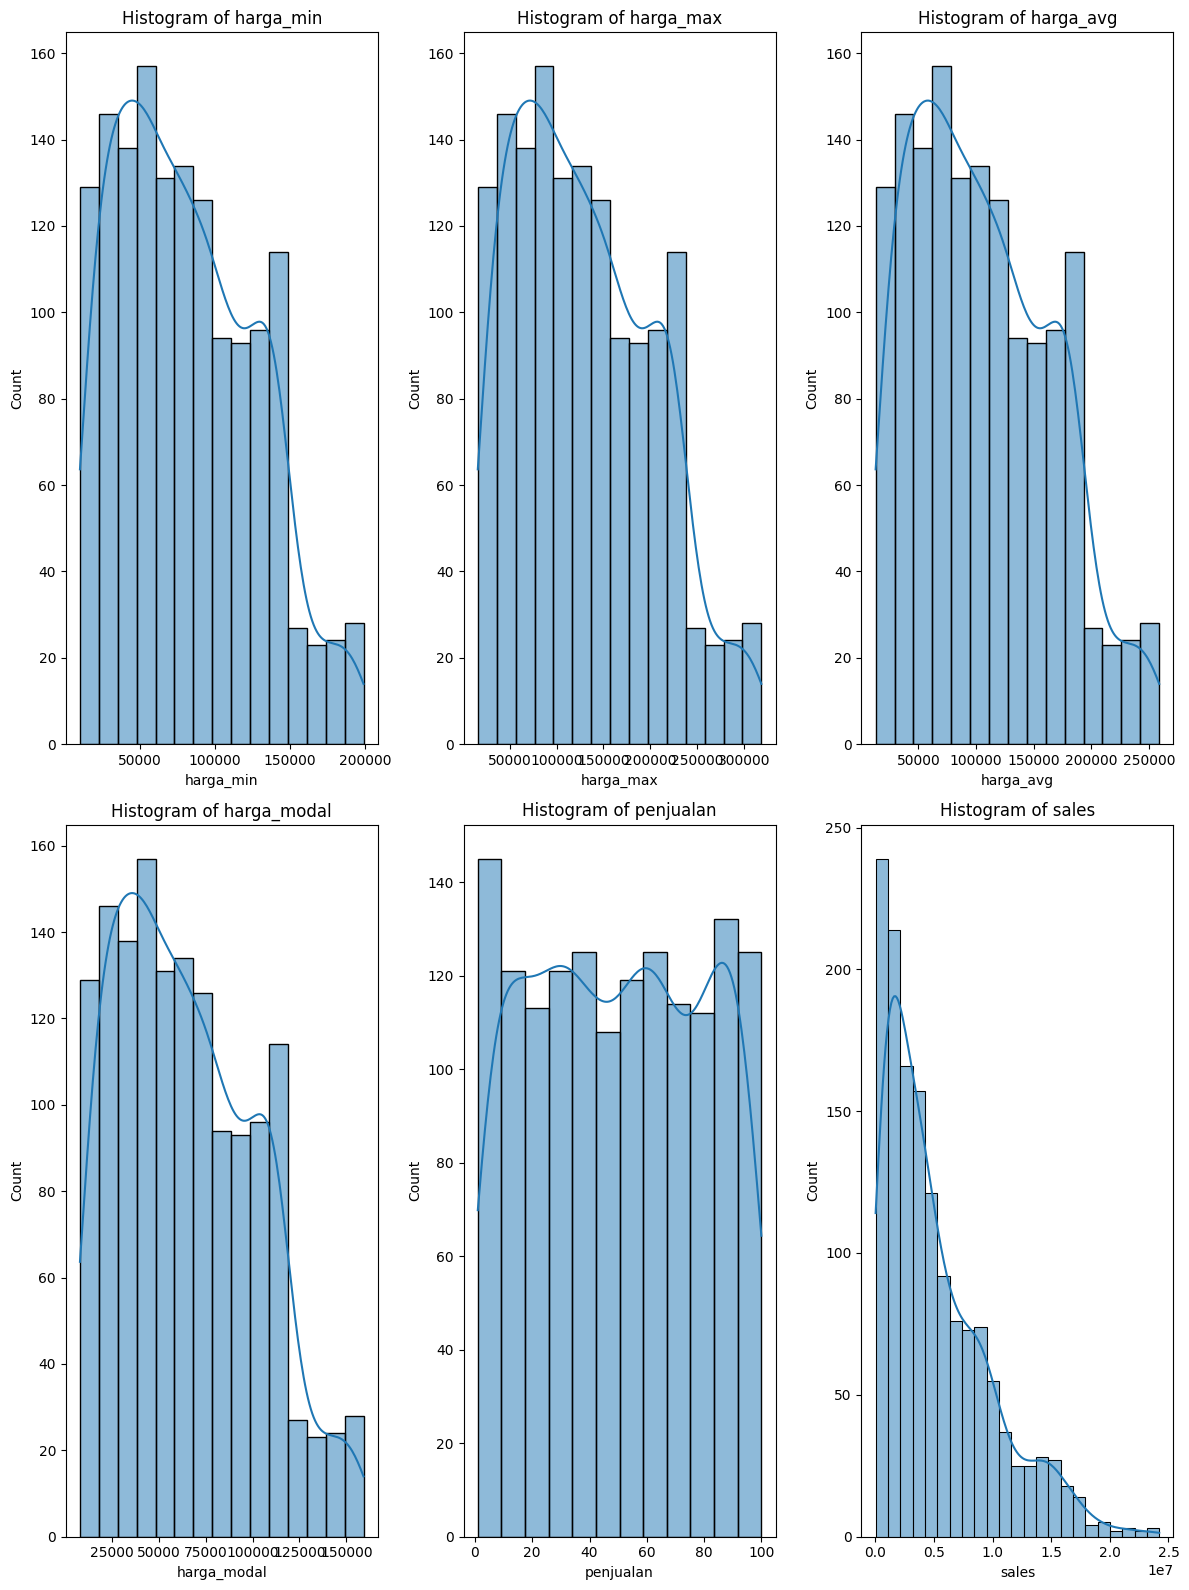

In [ ]:
plt.figure(figsize=(12, 16))
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)

# Tentukan jumlah baris dan kolom untuk subplot
num_rows = (num_numerical_columns // 3) + min(num_numerical_columns % 3, 1)
num_cols = min(num_numerical_columns, 3)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

## Box Plot

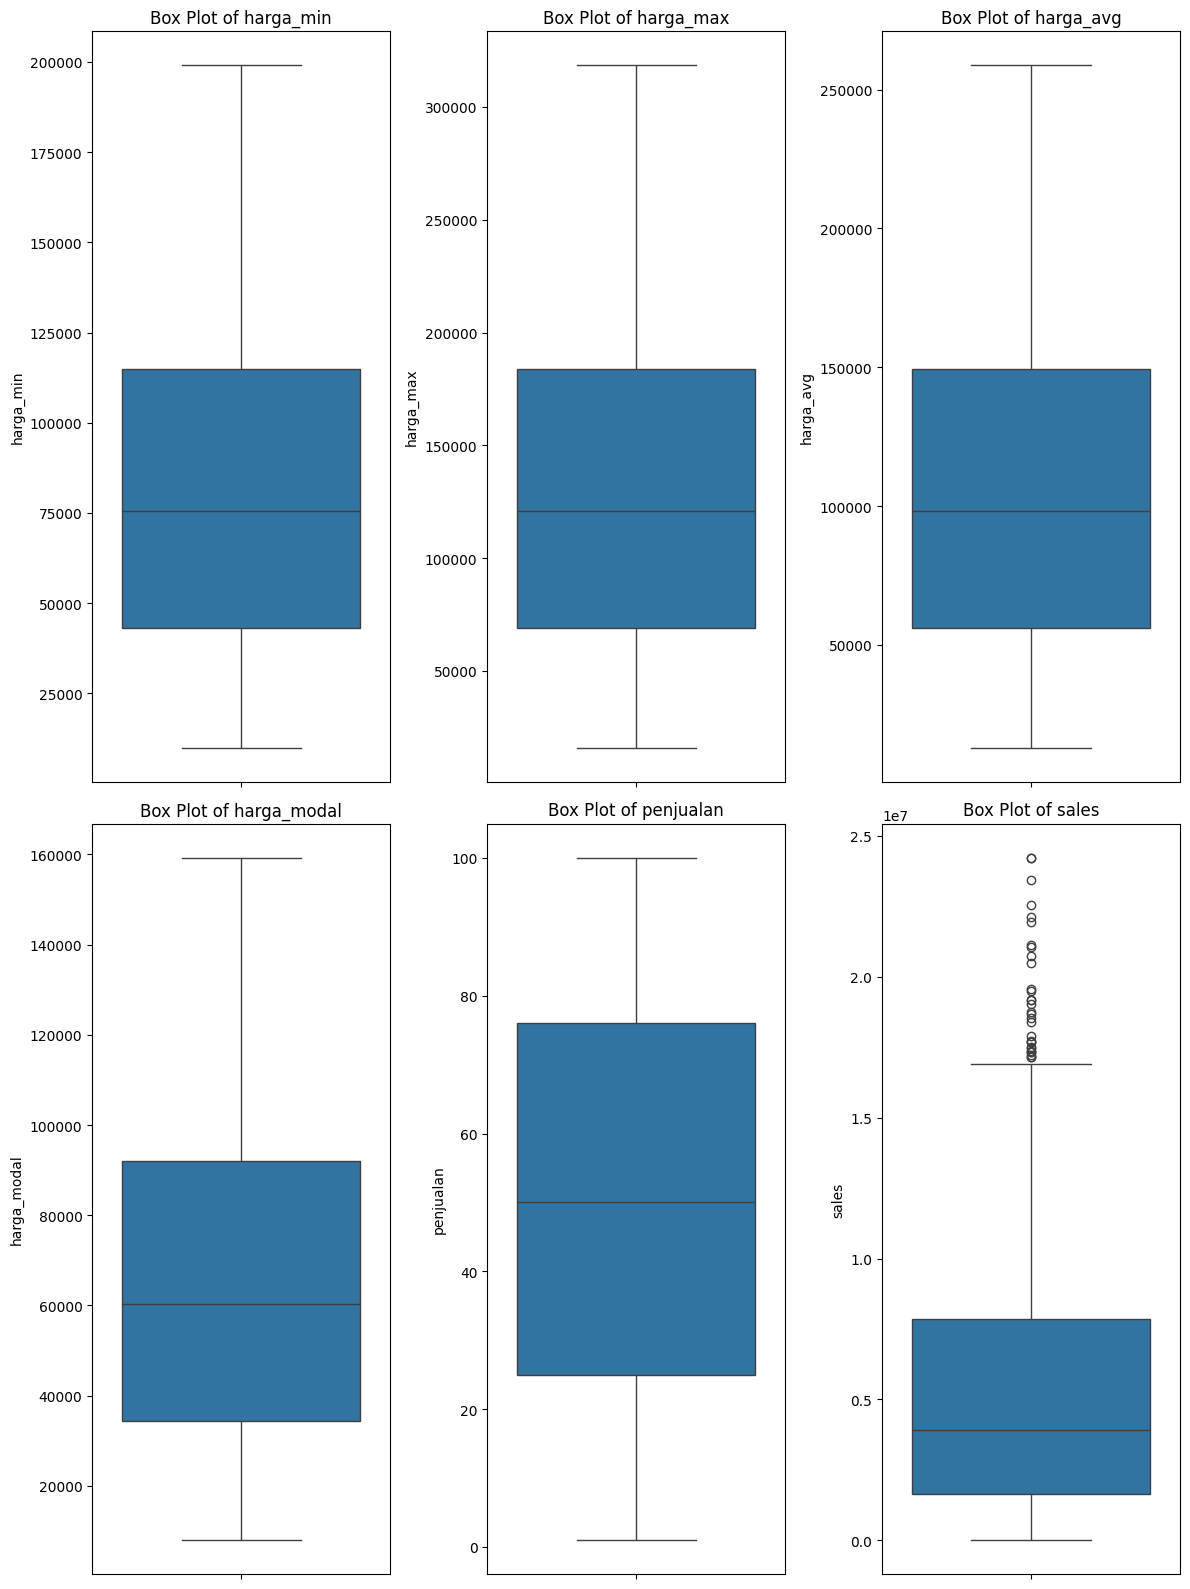

In [ ]:
plt.figure(figsize=(12, 16))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

## Heatmap Korelasi

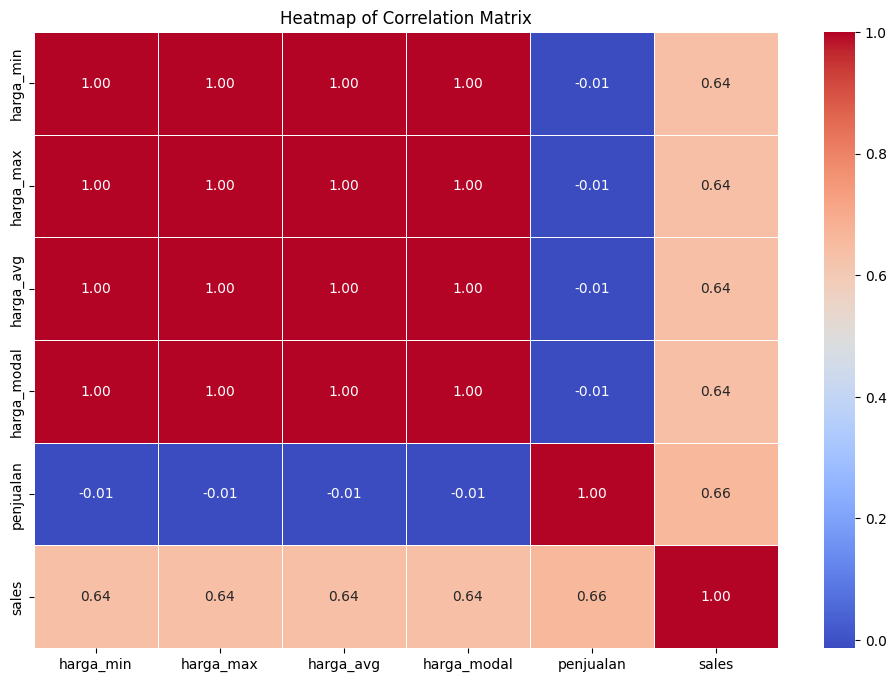

In [ ]:
# Hitung matriks korelasi
correlation_matrix = df[numerical_columns].corr()

# Buat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Bagaimana tren penjualan berubah seiring waktu?

### Tren penjualan bulanan

In [ ]:
a = df.set_index("tanggal").resample("M").penjualan.mean().reset_index()
a["tahun"] = a.tanggal.dt.year
px.line(a, x='tanggal', y='penjualan', color='tahun',title = "Monthly Average Transactions" )

### Tren penjualan mingguan

In [ ]:
penjualan_week = df.copy()
penjualan_week["year"] = penjualan_week.tanggal.dt.year
penjualan_week["dayofweek"] = penjualan_week.tanggal.dt.dayofweek+1
penjualan_week = penjualan_week.groupby(["year", "dayofweek"]).penjualan.mean().reset_index()
px.line(penjualan_week, x="dayofweek", y="penjualan" , color = "year", title = "Weekly Average Transactions")

## Variasi Penjualan Sepanjang Tahun

In [ ]:
var_penjualan = df.copy()
var_penjualan['tahun'] = var_penjualan.tanggal.dt.year
var_penjualan['bulan']= var_penjualan.tanggal.dt.month
px.box(var_penjualan.sort_values(by='bulan'), x="tahun", y="penjualan" , color = "bulan", title = "Variasi Penjualan Sepanjang Tahun")

### Hubungan antara Sales dengan Tanggal

In [ ]:
fig = px.scatter(df, x='tanggal', y='sales', trendline="ols", title="Hubungan antara Sales dengan Tanggal")
fig.show()

### Hubungan antara Penjualan dengan Tanggal

In [ ]:
fig = px.scatter(df, x='tanggal', y='penjualan', trendline="ols", title="Hubungan antara Penjualan dengan Tanggal")
fig.show()

### Hubungan antara Sales dengan Penjualan

In [ ]:
px.scatter(df, x = "penjualan", y = "sales", trendline = "ols", trendline_color_override = "red", title="Hubungan antara Sales dengan Penjualan")

## Mana kabupaten/kota yang memiliki penjualan tertinggi?

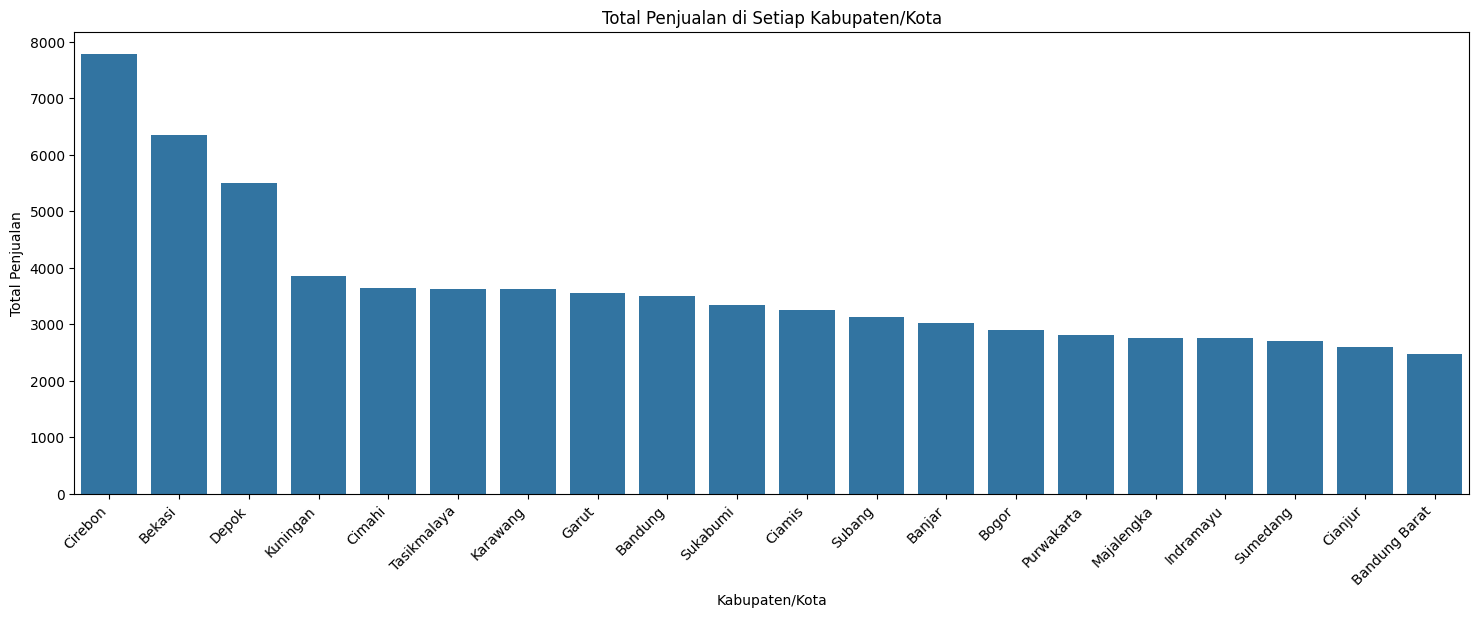

In [ ]:
# Menghitung total penjualan dari tiap kab/kota
penjualan_kota = df.groupby(["kab/kota"])[['penjualan']].sum().sort_values(by='penjualan', ascending=False)

# Membuat bar chart untuk berdasarkan penjualan
plt.figure(figsize=(18, 6))
sns.barplot(x = 'kab/kota', y = 'penjualan', data = penjualan_kota)
plt.title('Total Penjualan di Setiap Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Mengambil 3 kab/kota teratas berdasarkan total penjualan
top_3_kota = penjualan_kota['penjualan'].nlargest(3).index

# Filter data hanya untuk 3 kota teratas
filtered_df = df[df["kab/kota"].isin(top_3_kota)]

# Visualisasi data dengan plot menggunakan Plotly Express
fig = px.line(filtered_df.sort_values(["kab/kota", "tanggal"]), x='tanggal', y='penjualan', color='kab/kota',title = "Top 3 Kota dengan Penjualan Tertinggi")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Daily Sales untuk Setiap Kabupaten/Kota

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Mengatur indeks berdasarkan kolom "tanggal"
city_daily_sales = df.set_index("tanggal").groupby("kab/kota").resample("D").sales.sum().reset_index()

# Membuat subplot 5x4
fig = sp.make_subplots(rows=5, cols=4, subplot_titles=city_daily_sales["kab/kota"].unique())

# Menambahkan setiap plot garis ke subplot
for i, kota in enumerate(city_daily_sales["kab/kota"].unique()):
    data = city_daily_sales[city_daily_sales["kab/kota"] == kota]
    trace = go.Scatter(x=data["tanggal"], y=data["sales"], mode="lines", name=kota)
    fig.add_trace(trace, row=(i // 4) + 1, col=(i % 4) + 1)

# Mengatur tata letak dan judul
fig.update_layout(title="Daily Sales by City", showlegend=False, height=1800, width=1500)

# Menampilkan plot
fig.show()

## Korelasi antara Sales di Berbagai Kabupaten/Kota

<ipython-input-31-7e238f7e6846>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-7e238f7e6846>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



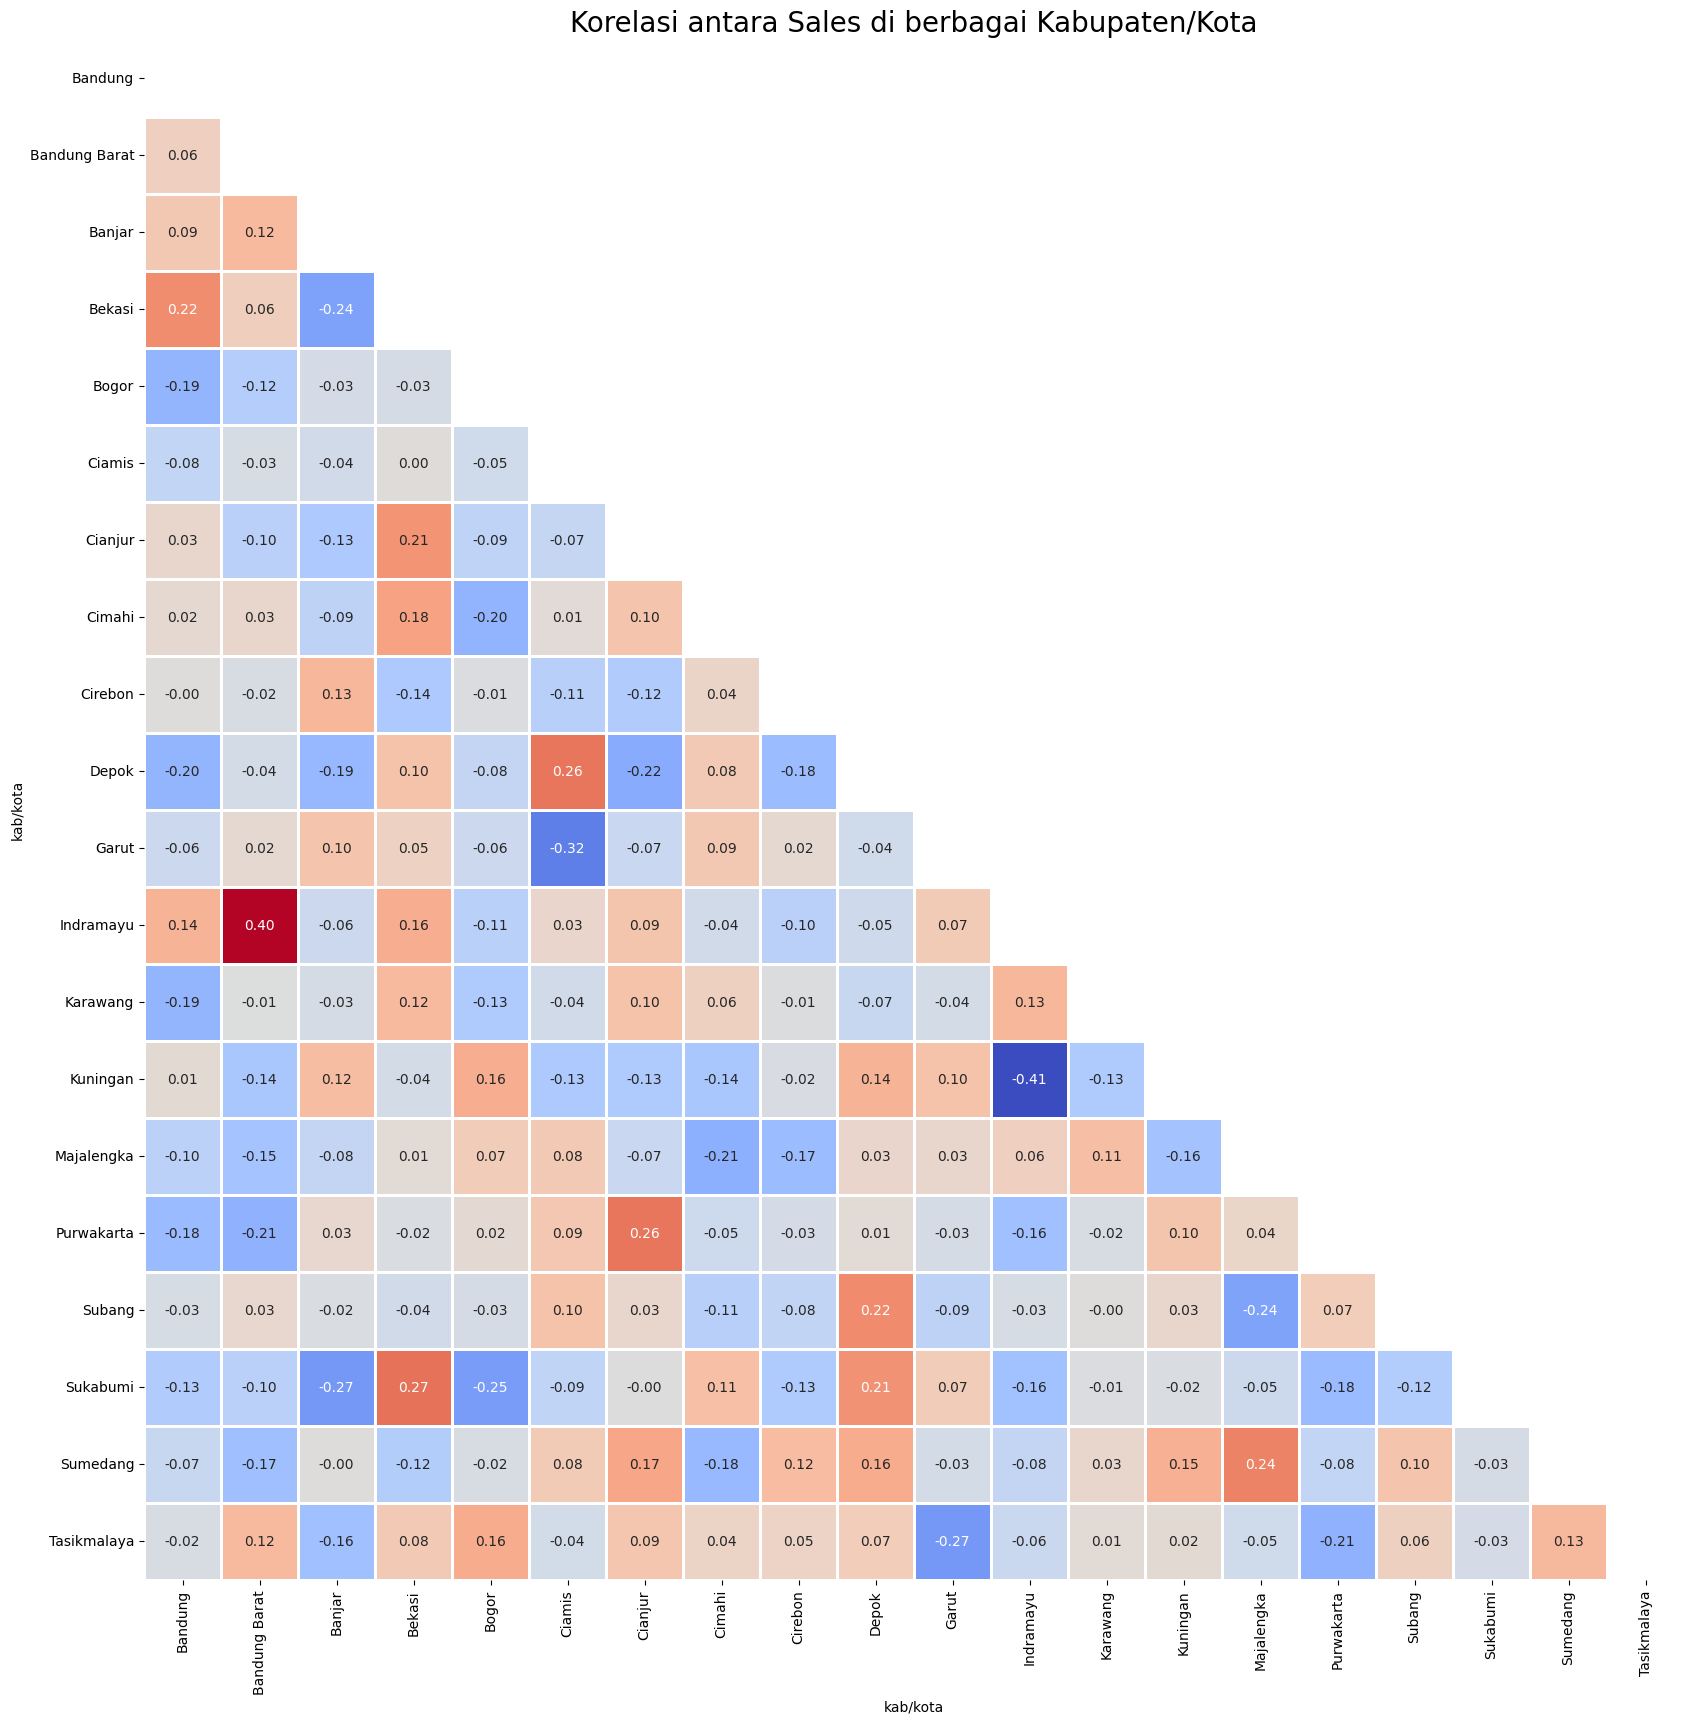

In [ ]:
city_sales = df[["kab/kota", "sales"]]
city_sales["ind"] = 1
city_sales["ind"] = city_sales.groupby("kab/kota").ind.cumsum().values
city_sales = pd.pivot(city_sales, index = "ind", columns = "kab/kota", values = "sales").corr()
mask = np.triu(city_sales.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(city_sales,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Korelasi antara Sales di berbagai Kabupaten/Kota",fontsize = 20)
plt.show()

## Kategori produk mana yang memberikan kontribusi terbesar pada sales?

In [ ]:
kategori_sales = df.groupby("kategori").sales.mean().sort_values(ascending = False).reset_index()
px.bar(kategori_sales, y = "kategori", x="sales", color = "kategori", title = "Kategori produk mana memberikan kontribusi terbesar pada sales?")

## Daily Sales berdasarkan Kategori

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Mengatur indeks berdasarkan kolom "tanggal"
cat_daily_sales = df.set_index("tanggal")

# Melakukan pengelompokan berdasarkan kolom "kategori" dan resampling harian
cat_daily_sales = cat_daily_sales.groupby("kategori").resample("D").sales.sum().reset_index()

# Membuat subplot 10x3
fig = sp.make_subplots(rows=10, cols=3, subplot_titles=cat_daily_sales["kategori"].unique())

# Menambahkan setiap plot garis ke subplot
for i, kategori in enumerate(cat_daily_sales["kategori"].unique()):
    data = cat_daily_sales[cat_daily_sales["kategori"] == kategori]
    trace = go.Scatter(x=data["tanggal"], y=data["sales"], mode="lines", name=kategori)
    fig.add_trace(trace, row=(i // 3) + 1, col=(i % 3) + 1)

# Mengatur tata letak dan judul
fig.update_layout(title="Daily Sales by Category", showlegend=False, height=2000, width=1000)

# Menampilkan plot
fig.show()

## Apakah kualitas produk mempengaruhi penjualan?

In [ ]:
# Menghitung total penjualan dari tiap kab/kota
penjualan_kualitas = df.groupby(["kualitas"])[['penjualan']].sum().sort_values(by='penjualan', ascending=False)
penjualan_kualitas

,penjualan
kualitas,
Premium,19025
Standard,18343
Import,18305
Local,17497


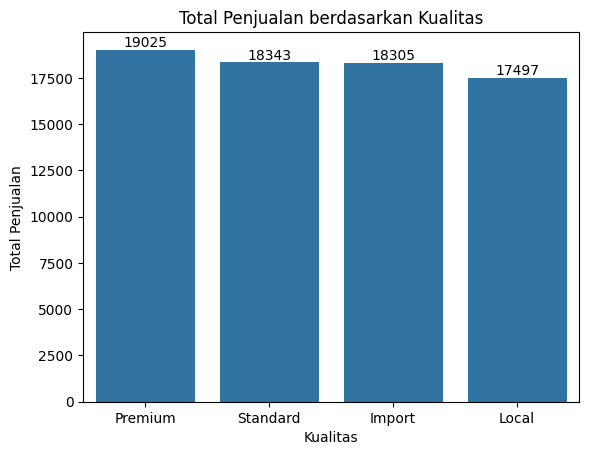

In [ ]:
# Membuat bar chart untuk berdasarkan penjualan
ax = sns.barplot(x = 'kualitas', y = 'penjualan', data = penjualan_kualitas)
plt.title('Total Penjualan berdasarkan Kualitas')
plt.xlabel('Kualitas')
plt.ylabel('Total Penjualan')
ax.bar_label(ax.containers[0])
plt.show()